In [1]:
import sys
import artm

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from tqdm import tqdm

sys.path.append('../src')
from topic_modeling import *

/Users/v.khodyreva/anaconda3/envs/py36/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))


In [2]:
batches_path = '../data/interim/batches'

dictionary = artm.Dictionary()
dictionary.gather(data_path=batches_path)
# dictionary.load(dictionary_path='../data/interim/batches/dictionary.dict')

batch_vectorizer = artm.BatchVectorizer(data_path=batches_path, data_format='batches')

articles = pd.read_csv('../data/interim/articles_preproc.csv')
labels_true = articles[['id', 'hr_level_0', 'hr_level_3']]

In [5]:
articles.head(2)

,id,hr_level_0,hr_level_1,hr_level_2,hr_level_3,hr_level_4,time,publication,title,snippet,text,preproc_title,preproc_text
0,0,Авто,NaN,NaN,100-1522358232202121,NaN,2018-03-29T14:13:00,Финмаркет,В этом году на льготные автокредиты и лизинг б...,FINMARKET.RU - Премьер России Дмитрий Медведев...,В этом году на льготные автокредиты и лизинг б...,# sent_id = 0\n# text = В этом году на льготны...,# sent_id = 0\n# text = В этом году на льготны...
1,1,Авто,NaN,NaN,100-1522358232202121,NaN,2018-03-29T14:16:00,ТАСС,Медведев: около 50 тыс. машин продадут в 2018 ...,Около 50 тыс. автомашин будет продано в текуще...,Около 50 тыс. автомашин будет продано в текуще...,# sent_id = 0\n# text = Медведев: около 50 тыс...,# sent_id = 0\n# text = Около 50 тыс. автомаши...


In [3]:
def metrics_visualisation(scores):
    
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    
    for index, (score_name, model_scores) in enumerate(scores.items()):
        
        i = index % 3
        j = index % 2
        
        model_scores = pd.DataFrame(model_scores)
        
        x = model_scores.index.values
        
        for model_name in model_scores.columns:
            
            y = model_scores.loc[:, model_name]
            axes[i, j].plot(x, y, label=model_name)
            
        axes[i, j].set_ylabel(score_name)
        axes[i, j].legend()
    
    fig.tight_layout()

In [7]:
hier = TopicHierarchicalModeling(dictionary=dictionary, num_collection_passes=1, 
                                 class_ids={'title': 1.0, 'text': 1.0, 
                                            'level_0': 50.0, 'level_3': 1.0})

  0%|          | 0/50 [00:00<?, ?it/s]/Users/v.khodyreva/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
  2%|▏         | 1/50 [00:04<03:47,  4.65s/it]/Users/v.khodyreva/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
  4%|▍         | 2/50 [00:08<03:32,  4.43s/it]/Users/v.khodyreva/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
  6%|▌

 50%|█████     | 25/50 [01:43<01:43,  4.13s/it]/Users/v.khodyreva/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
 52%|█████▏    | 26/50 [01:47<01:39,  4.13s/it]/Users/v.khodyreva/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
 54%|█████▍    | 27/50 [01:51<01:34,  4.12s/it]/Users/v.khodyreva/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarn

100%|██████████| 50/50 [03:38<00:00,  4.37s/it]


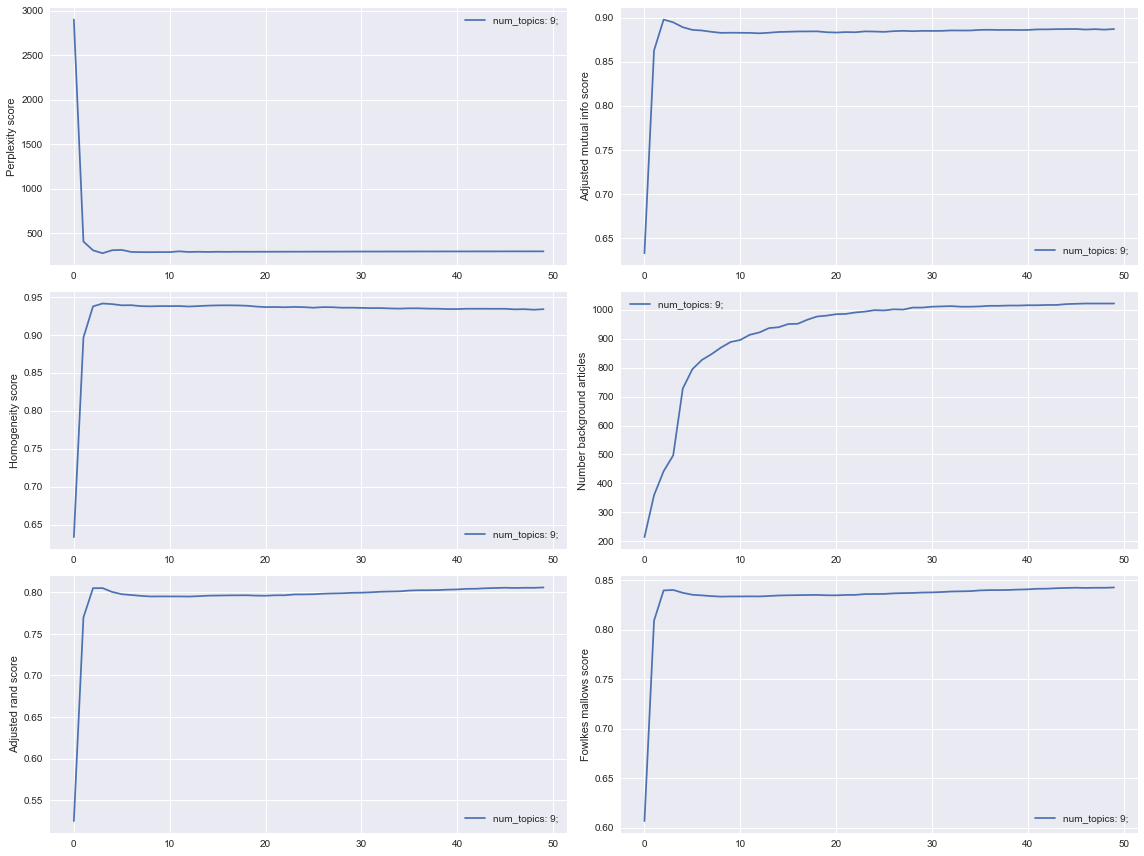

In [8]:
# num_topics = 9
level_idx = 0
num_collection_passes = 50

scores = {'Perplexity score': {},
              'Number background articles': {},
              'Adjusted rand score': {},
              'Adjusted mutual info score': {},
              'Homogeneity score': {}, 
              'Fowlkes mallows score': {}}

for num_topics in np.arange(9, 10, 1):
    
    model_name = 'num_topics: {};'.format(num_topics)
#     model_name += ' sm_back: {:.1f};'.format(smooth_background_tau)
        
    hier.add_level(num_topics=num_topics, smooth_background_tau=1, 
                   sparse_phi_tau=0, decorrelator_phi_tau=0.1, sparse_label_tau=0.9)

    for epoch in tqdm(range(num_collection_passes)):

        labels_pred = hier.fit_predict(level_idx, batch_vectorizer)

        n_background_articles = len(get_background_articles(articles, labels_pred))
        if (n_background_articles == len(articles)): break

        scores['Number background articles'].setdefault(model_name, [])
        scores['Number background articles'][model_name].append(n_background_articles)

        perplexity_score = hier.model.get_level(level_idx).score_tracker['perplexity'].last_value

        scores['Perplexity score'].setdefault(model_name, [])
        scores['Perplexity score'][model_name].append(perplexity_score)

        adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, \
                        fowlkes_mallows_score = get_metrics(labels_true, labels_pred)

        scores['Adjusted rand score'].setdefault(model_name, [])
        scores['Adjusted rand score'][model_name].append(adjusted_rand_score)

        scores['Adjusted mutual info score'].setdefault(model_name, [])
        scores['Adjusted mutual info score'][model_name].append(adjusted_mutual_info_score)

        scores['Homogeneity score'].setdefault(model_name, [])
        scores['Homogeneity score'][model_name].append(homogeneity_score)

        scores['Fowlkes mallows score'].setdefault(model_name, [])
        scores['Fowlkes mallows score'][model_name].append(fowlkes_mallows_score)
                
    hier.del_level(level_idx)
    
metrics_visualisation(scores)
plt.show()

In [9]:
def print_topics(labels_pred, level_idx=0, labels_col='hr_level_0'):
    for topic_name, title_top_tokens in hier.model.get_level(level_idx).score_tracker['title_top_tokens'].last_tokens.items():

        print(topic_name.upper())
        print('TITLE: '+', '.join(title_top_tokens) + '\n')

        text_top_tokens = hier.model.get_level(level_idx).score_tracker['text_top_tokens'].last_tokens[topic_name]
        print('TEXT: '+', '.join(text_top_tokens) + '\n')

        topic_labels_pred = labels_pred[labels_pred == topic_name]
        print('TOPIC SIZE: %s'%len(topic_labels_pred))

        topic_ids = topic_labels_pred.index.astype(int)
        corresponding_topics = articles[articles.id.isin(topic_ids)].groupby(labels_col).id.count().sort_values(ascending=False)
        try:
            print(corresponding_topics.index[0])
        except:
            print('Empty list of corresponding topics')
        print('; '.join(['%s - %s'%(name, value) for name, value in zip(corresponding_topics.index, corresponding_topics.values)]))

        print('\n')
        print('\n')

### Level 0

In [11]:
num_collection_passes = 50

hier = TopicHierarchicalModeling(dictionary=dictionary, num_collection_passes=1,
                                 class_ids={'title': 1.0, 'text': 1.0, 
                                            'level_0': 50.0, 'level_3': 1.0})
hier.add_level(
    num_topics=9, smooth_background_tau=1, 
    sparse_phi_tau=0, decorrelator_phi_tau=0.1,
    sparse_label_tau=0.9
)
level_idx = 0
for epoch in tqdm(range(num_collection_passes)):
    labels_pred_0 = hier.fit_predict(level_idx, batch_vectorizer)

100%|██████████| 50/50 [02:11<00:00,  2.62s/it]


### Level 1

In [35]:
num_collection_passes = 40
hier.add_level(num_topics=40, smooth_background_tau=1,
                   sparse_phi_tau=0, decorrelator_phi_tau=0.1)
level_idx = 1
for epoch in tqdm(range(num_collection_passes)):
    labels_pred_1 = hier.fit_predict(level_idx, batch_vectorizer)



  0%|          | 0/40 [00:00<?, ?it/s]

  2%|▎         | 1/40 [00:02<01:46,  2.72s/it]

  5%|▌         | 2/40 [00:06<01:54,  3.00s/it]

  8%|▊         | 3/40 [00:08<01:49,  2.97s/it]

 10%|█         | 4/40 [00:11<01:44,  2.91s/it]

 12%|█▎        | 5/40 [00:14<01:42,  2.92s/it]

 15%|█▌        | 6/40 [00:17<01:39,  2.92s/it]

 18%|█▊        | 7/40 [00:20<01:35,  2.90s/it]

 20%|██        | 8/40 [00:23<01:32,  2.89s/it]

 22%|██▎       | 9/40 [00:25<01:28,  2.87s/it]

 25%|██▌       | 10/40 [00:28<01:25,  2.86s/it]

 28%|██▊       | 11/40 [00:31<01:22,  2.86s/it]

 30%|███       | 12/40 [00:34<01:19,  2.85s/it]

 32%|███▎      | 13/40 [00:37<01:16,  2.85s/it]

 35%|███▌      | 14/40 [00:39<01:13,  2.84s/it]

 38%|███▊      | 15/40 [00:42<01:10,  2.83s/it]

 40%|████      | 16/40 [00:45<01:07,  2.82s/it]

 42%|████▎     | 17/40 [00:47<01:04,  2.82s/it]

 45%|████▌     | 18/40 [00:50<01:01,  2.82s/it]

 48%|████▊     | 19/40 [00:53<00:59,  2.82s/it]

 50%|█████     | 20/40 [00:56<00:56,

### Level 2

In [64]:
num_collection_passes = 30
hier.add_level(num_topics=100, smooth_background_tau=1,
                   sparse_phi_tau=0, decorrelator_phi_tau=0.1)
level_idx = 2
for epoch in tqdm(range(num_collection_passes)):
    labels_pred_2 = hier.fit_predict(level_idx, batch_vectorizer)



  0%|          | 0/30 [00:00<?, ?it/s]

  3%|▎         | 1/30 [00:05<02:46,  5.76s/it]

  7%|▋         | 2/30 [00:10<02:33,  5.49s/it]

 10%|█         | 3/30 [00:16<02:27,  5.45s/it]

 13%|█▎        | 4/30 [00:21<02:20,  5.40s/it]

 17%|█▋        | 5/30 [00:26<02:14,  5.38s/it]

 20%|██        | 6/30 [00:32<02:09,  5.39s/it]

 23%|██▎       | 7/30 [00:37<02:03,  5.38s/it]

 27%|██▋       | 8/30 [00:43<01:58,  5.40s/it]

 30%|███       | 9/30 [00:48<01:53,  5.41s/it]

 33%|███▎      | 10/30 [00:54<01:48,  5.42s/it]

 37%|███▋      | 11/30 [00:59<01:42,  5.40s/it]

 40%|████      | 12/30 [01:04<01:37,  5.39s/it]

 43%|████▎     | 13/30 [01:10<01:31,  5.39s/it]

 47%|████▋     | 14/30 [01:16<01:26,  5.43s/it]

 50%|█████     | 15/30 [01:21<01:21,  5.42s/it]

 53%|█████▎    | 16/30 [01:26<01:15,  5.40s/it]

 57%|█████▋    | 17/30 [01:31<01:10,  5.40s/it]

 60%|██████    | 18/30 [01:37<01:04,  5.39s/it]

 63%|██████▎   | 19/30 [01:42<00:59,  5.38s/it]

 67%|██████▋   | 20/30 [01:47<00:53,

### Level 3

In [20]:
articles['hr_level_0'].value_counts()

Политика        3082
Спорт           2332
Общество        1319
Происшествия    1071
Экономика        838
Наука            750
Технологии       728
Авто             516
Культура         491
Name: hr_level_0, dtype: int64

In [ ]:
Экономика
Политика
Политика
Культура
Политика
Наука
Спорт
Спорт

Происшествия
Общество
Авто
Технологии

In [12]:
print_topics(labels_pred_0, level_idx=0, labels_col='hr_level_0')

TOPIC_0
TITLE: область, автобус, пожар, тулеев, центр, газ, кемерово, тюрьма, тц, погибнуть, произойти, попасть, семья, кемеровский, мужчина, зимний, лёд, неизвестный, колония, полиция, край, жертва, мчс, проверка, взрыв, задержать, молодой, погибший, теракт, загореться, вишня, аэс, дтп, аэропорт, эвакуировать, устроить, кубань, квартира, группа, подозреваемый, венесуэла, возгорание, авария, парламент, берлина, румыния, очаг, полицейский, приговорить, пострадать, сбить, мурманск, этаж, ск, адвокат, посылка, неисправный, девочка, объект, иртыш, приговор, месяц, заработок, едровый, подросток, хабаровский, стекло, отравление, убер, взорвать, перечислить, газманов, вербовщик, строгий, выброс, запросить, сербия, учитель, выбить, венесуэльский, жилой, пытаться, однодневный, пермский, пожарный, бунт, хищение, ульяновск, попытаться, арестованный, лифт, уголовный, арестовать, взятка, ярославль, гибдд, электростанция, взрывчатка, новгородский, полковник

TEXT: пожар, суд, уголовный, область, пол

TEXT: спортсмен, виза, олимпийский, вольный, допинг, олимпиада, проба, борец, железнов, армения, собеседование, батальон, атлет, гонка, отказать, медаль, аз, ахмат, мамиашвили, айова-сити, невыдача, гитлер, антидопинговый, кусок, сивко, отказ, мокнуть, аудитор, сивкова, армянский, заочно, выдача, оптимизация, логин, промах, индивидуальный, азов, григорий, биатлон, наёмник, призёр, семинар, нехватка, студенческий, дисциплинарный, консульский, холодильник, допинговый, налогоплательщик, пхотый, персонал, фрам, сро, лагерь, состязание, егоров, информатор, лаборатория, белоруссия, дискриминация, боец, ходченков, родченко, атлетика, рейх, национальность, отстранение, пхенчхан, наглядный, воспрепятствование, дегтярев, националистический, вор, ирина, нацистский, пончик, wад, воровской, забег, ап, преследование, паралимпиец, мороженое, сообщество, съесть, совесть, лорд, родченков, приезжать, тяжелоатлет, аудиторский, ониани, фунцтион, шишка, пхёнчхан, роднина, платини, перебор, биатлонист, схем

In [ ]:
print_topics(labels_pred_0, level_idx=0, labels_col='hr_level_0')

In [55]:
print_topics(labels_pred_1, level_idx=1, labels_col='hr_level_1')

TOPIC_1
TITLE: выйти, сиэтл, финал, фифа, расизм, уильямс, мёртвый, потро, коран, гонка, брат, рублёв, выкрик, проявление, парный, соперник, астапенко, назаренко, важный, биатлон, мастер, wта, шахматный, веснин, резиденция, виталина, выступление, макаров, кербер, шахматист, шарапов, хуан, вердаско, генконсул, пауэрс, итф, егоров, нанести, напугать, брайан, теннисистка, авиабилет, теннисный, титул, фара, обзор, немец, пробежка, выставленный, гроссмейстер, покинутый, юрьев, спекулянт, дональд, судный, сет, бобур, смертин, димитров, монтеррей, входной, усилившийся, дважды, оскорбление, спекуляция, нельзя, хитрый, полотно, чорич, атп, сальто, голеностоп, классика, хазанов, испугаться, лазаренко, кизнер, карло, дипмиссия, звонарёва, штутгарт, кунченко, генетический, взволнованный, уханье, надоесть, экс-один, возмездие, пугать, нетwорк, агрессор, именитый, темнокожий, заслуженный, весовой, филат

TEXT: турнир, майами, круг, карякин, ошибка, четвертьфинал, претендент, брейк, четыре, периметр,

TEXT: новый, компания, рубль, смартфон, устройство, корпорация, стоимость, продажа, доступный, представить, производитель, технология, планшет, новинка, можно, версия, ипад, пособие, приобрести, плус, китайский, возможность, выпустить, операционный, поддержка, обновление, разработка, приложение, покупатель, аккумулятор, телефон, дорогой, бюджетный, магазин, создание, платформа, стоить, смочь, основный, час, батарея, память, теперь, планировать, минимальный, продукт, средний, специальный, популярный, кук, продукция, стоять, купить, стилус, выделить, позволять, обойтись, материал, наушник, пенцил, флагман, цвет, представленный, панель, вариант, тхе, поддерживать, сканер, название, аппарат, покупка, работающий, установленный, продавать, максимальный, смарт, чикаго, обладать, ми, программа, использование, современный, самсунг, двойной, позволить, рейтинг, просмотр, стратегия, старый, оснастить, wатч, сегмент, яндекс, аренда, занимать, бесплатный, обеспечивать, выход, замедление, предыдущий

TEXT: матч, игра, сборная, игрок, сезон, победа, гол, очко, футболист, регулярный, тренер, форвард, нхл, шайба, набрать, нападающий, играть, состав, передача, два, провести, главный, поражение, хороший, товарищеский, место, один, мяч, результативный, забить, поле, пропустить, испания, гость, хозяин, аргентина, одержать, защитник, нынешний, травма, россиянин, карьера, смолоть, контракт, полузащитник, тур, бразилия, болельщик, пройти, бостон, химки, сборный, бросок, рейнджерс, спартак, три, евгений, забросить, проиграть, актив, хотеть, состояться, нью-йорк, победить, овечкин, участие, выиграть, звезда, динамо, мбапп, реал, период, занимать, фёдор, выступать, принять, отметиться, оформить, кузнец, англия, победитель, польза, вест, ворота, шанс, барселона, завершиться, таблица, смочь, юнайтед, площадка, минута, фк, швед, национальный, овертайм, манчестер, европа, отличиться, санкт-петербург

TOPIC SIZE: 892
CORRESPONDING TOPIC: Футбол
Футбол - 459; Хоккей - 259; Баскетбол - 151; Волейбол -

TEXT: человек, учёный, специалист, исследование, торговый, причина, использовать, вирус, кемерово, тело, животное, погибший, вода, жертва, помочь, планета, искусственный, тулеев, возраст, отставка, тц, институт, обнаруженный, процесс, производство, позволить, выявить, объект, разработать, разный, изменение, тюрьма, можно, заключённый, человеческий, например, испытание, риск, пациент, погибнуть, электронный, робот, вероятность, автор, маска, считаться, мицрософт, форма, короткий, основа, открытый, показать, смерть, ткань, журнал, прийти, энергия, кровь, эксперимент, тёмный, канал, клетка, предполагать, поверхность, узнать, бунт, похожий, уникальный, переход, иск, очаг, привести, внутренний, цры, поздний, телескоп, почему, аман, инсульт, стиральный, след, последствие, кондитерский, скандал, часто, обеспечение, программный, путь, следить, голова, влиять, содержаться, экспертиза, боеинга, этап, рбк, элемент, затем, воздействие, карабобо

TOPIC SIZE: 126
CORRESPONDING TOPIC: Интернет
Интерн

TEXT: год, стать, раз, последний, александр, самый, занять, впервые, конец, коран, партия, тогда, текущий, чемпион, фабиан, гроссмейстер, италия, неделя, берлина, балл, выступление, лето, шахматный, этап, шахрияр, шахматы, алексей, корона, шахматист, чёрный, завершить, заключительный, ведущий, половина, ноябрь, дин, китаец, единственный, россиянка, получить, расположиться, фигура, признанный, позиция, губайдуллин, лишение, лежень, грищука, осень, минувший, ничья, всемирный, фигурный, почти, медаль, мамедьяров, показатель, кстати, плавание, азербайджанец, ход, левон, аронянин, август, армения, сагитов, уступить, имя, тамара, семин, весна, итоговый, тасс, лёгкий, уэсли, соответственно, десятка, участвовать, гульназа, лента, опередить, личный, молодой, катание, возраст, 14-метр, сложиться, алексеев, сюрприз, интрига, показать, паралимпиец, изменить, коммерсантъ, затем, сергей, столь, ледниковый, тюменский, всероссийский

TOPIC SIZE: 60
CORRESPONDING TOPIC: Шахматы
Шахматы - 33; Теннис - 1

TEXT: сша, видео, апрель, получить, человек, запретить, заявить, самый, почти, закрыть, начало, отказаться, срок, донбасс, смерть, выступить, власть, погибнуть, начаться, президент, мадагаскар, владелец, белый, край, ситуация, рак, вопрос, церковный, икона, бывший, великий, диктант, малиновский, яйцо, еврейский, число, рабство, народный, бюст, песаха, стиль, век, студент, альбатрос, вино, седмица, предупредить, культурный, раввин, альварес, устав, арка, кинопремия, ограничить, египет, стереолето, дебютировать, мутант, кафедра, плисецкий, последствие, звягинцев, единение, курсант, аллея, выложить, седер, стивен, вестерн, певица, фантастический, результат, моисей, капитан, макарий, историк, атолл, новость, медик, деревня, грэм, библиотека, алексин, календарь, религиозный, пенсия, калязинский, мясо, иудей, послабление, середа, избавление, преподобный, кристева, калужский, факультет, кантемир, зелень, синагога, кошерный

TOPIC SIZE: 44
CORRESPONDING TOPIC: Религия
Религия - 3; Кино - 3; Иг

In [66]:
# print_topics(labels_pred, level_idx=2, labels_col='hr_level_3')